**Работа с MNIST-подобными данными**

# Импорт данных

In [41]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации

import seaborn as sns # библиотека seaborn для визуализации

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

In [42]:
plt.style.use('dark_background')

# Метод главных компонент

In [43]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None

    #--------------------------------
    def fit(self, X):
        # обучение - в этом случае сводится к нахождению собственных значений и собственных векторов

        self.mean = np.mean(X, axis=0) # оценка среднего для каждого признака

        # Считаем матрицу ковариации, используя функцию библиотеки Numpy
        cov_matrix = np.cov(X - self.mean, rowvar = False) # не забываем вычитать среднее


        # считаем собственные значания и собственные вектора матрицы ковариации
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # для этого тоже есть функция Numpy


        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию собственных значений

        # Берём первые n собственных векторов
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx] # отсортированные собственные значения

        return self

    #--------------------------------
    def transform(self, X):
        # преобразование признаков в пространство главных компонент
        X = X - self.mean #вычитаем среднее
        return np.dot(X, self.components) #находим проекции признаков на собственные вектора (через скалярное произведение)
        #это и будут главные компоненты
    #--------------------------------
    def fit_transform(self, X):
        # 2 в 1: обучаем и преобразуем
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        # обратное преобразование
        # Главные компоненты скалярно домножаем на собственные вектора
        return np.dot(X_new, self.components.T) + self.mean # не забываем обратно добавить среднее
    #--------------------------------
    def score(self, X):
        # оцека "качества" восстановления, через коэффициент детерминации
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        # метод для отрисовки собственных значений (объясненной дисперсии)
        plt.figure(figsize=figsize)
        # отдельно мелкими точками визуализируем все собственные значения
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        # крупными маркерами - выбранное нами количество гласвных компонент
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('Собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(fontsize = 25); plt.yticks(fontsize = 25);
        plt.tight_layout();

In [44]:
def plot_scatter(x,y,title_x = '', title_y = ''):
    fig = plt.figure(figsize=(10,7))
    plt.grid()

    plt.scatter(x,y,
                alpha = 0.5, s = 196,
                c = 'orange', edgecolor = 'r')
    plt.xlabel(title_x,fontsize=35)
    plt.ylabel(title_y,fontsize=35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25);
    plt.xlim([-20,20])
    plt.ylim([-20,20])
    plt.tight_layout();

# Набор Kuzushiji-MNIST

In [45]:
X, y  = fetch_openml('Kuzushiji-MNIST', version=1, return_X_y=True, as_frame = True)
X = X / 255.
X_ = X.values

In [46]:
X

,pixel-0000,pixel-0001,pixel-0002,pixel-0003,pixel-0004,pixel-0005,pixel-0006,pixel-0007,pixel-0008,pixel-0009,...,pixel-0774,pixel-0775,pixel-0776,pixel-0777,pixel-0778,pixel-0779,pixel-0780,pixel-0781,pixel-0782,pixel-0783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.478431,1.000000,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125490,0.643137,...,1.000000,0.250980,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607843,0.768627,...,0.329412,0.231373,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


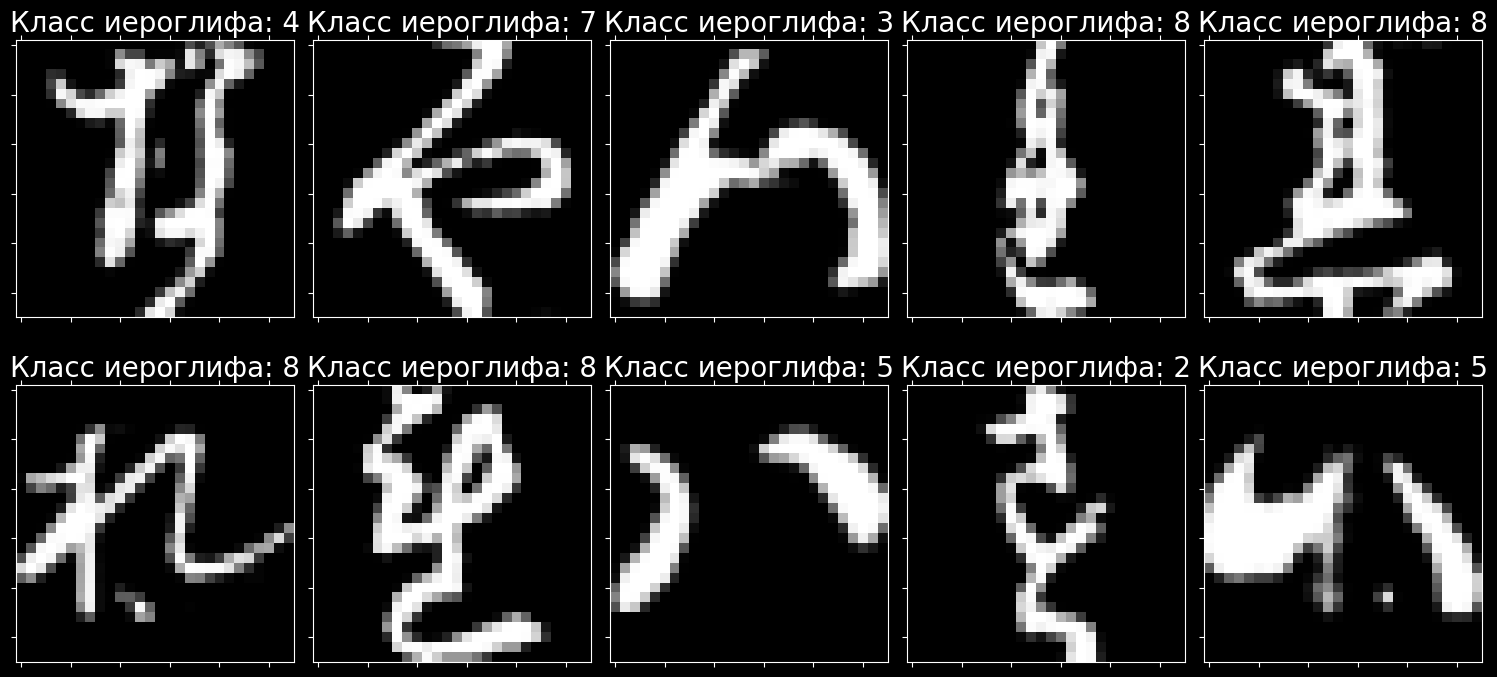

In [47]:
n =  15258

fig = plt.figure( figsize=(15,8) )

for i in range(0,10):
    ax = fig.add_subplot(2,5,i+1)
    ax.set_title(f"Класс иероглифа: {y[i + n]}", size=20)
    ax.matshow(1-X.loc[i+n,'pixel-0000':'pixel-0783'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()

Вот все 10 классов иероглифов:

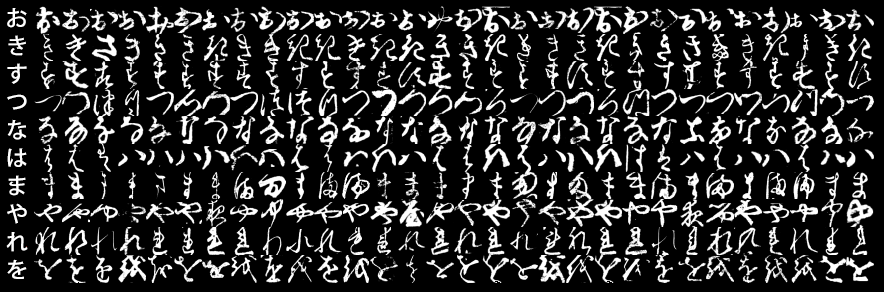

In [48]:
X_plot = X.loc[0:1000,'pixel-0371':'pixel-0375'].copy()

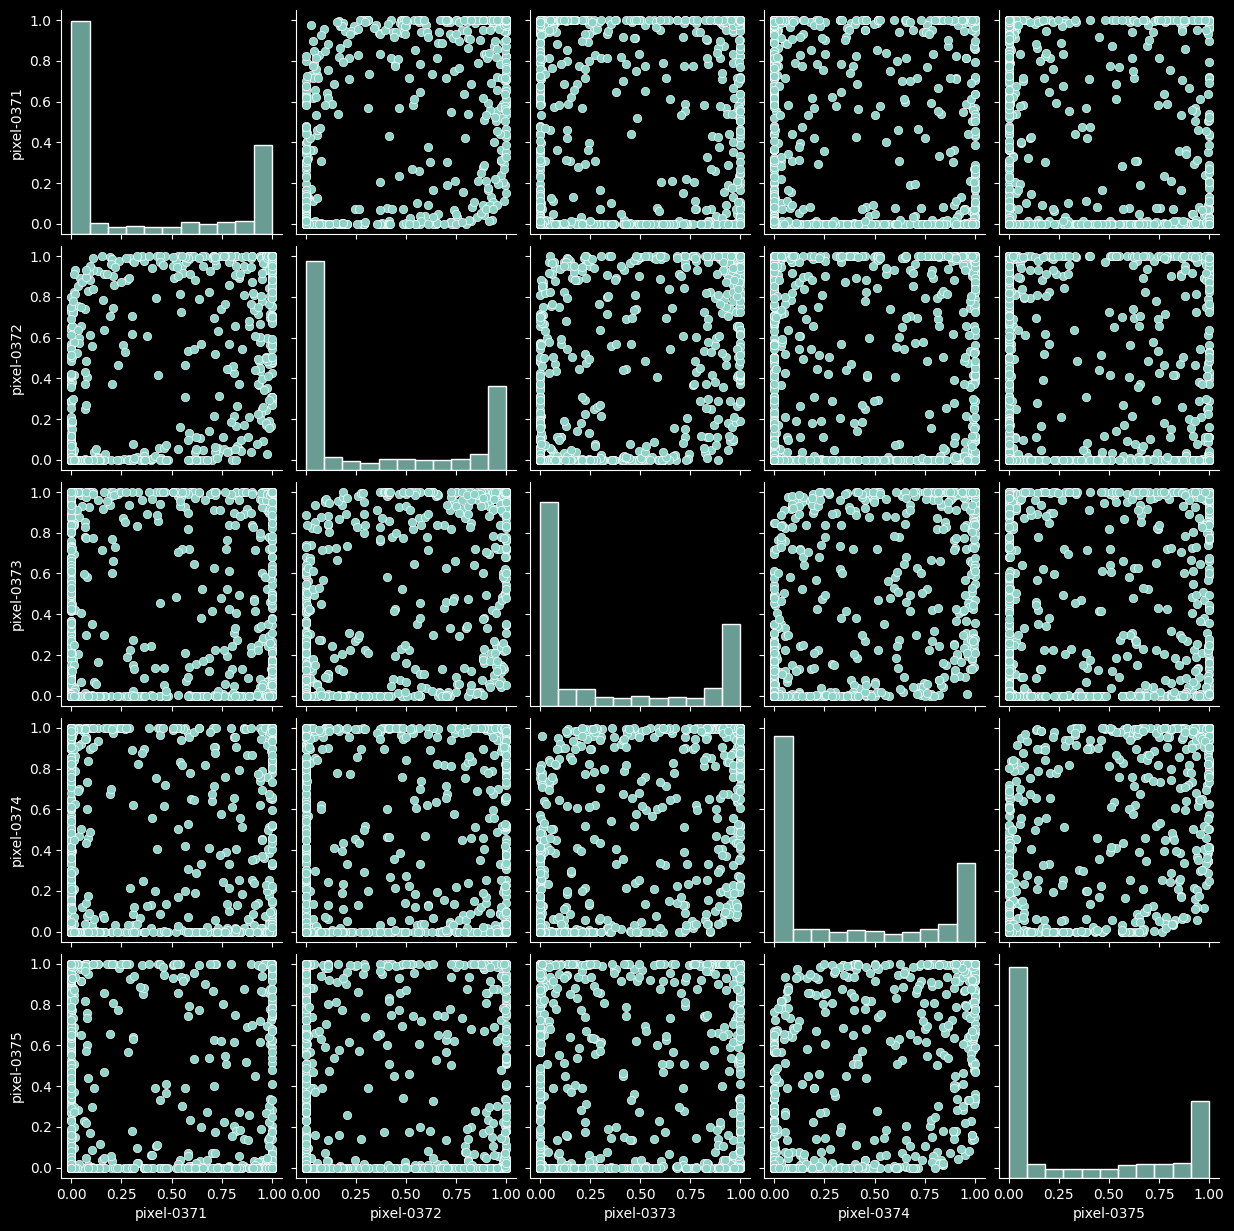

In [49]:
sns.pairplot(X_plot);

In [50]:
X_plot = X.loc[0:1000,'pixel-0001':'pixel-0005'].copy()

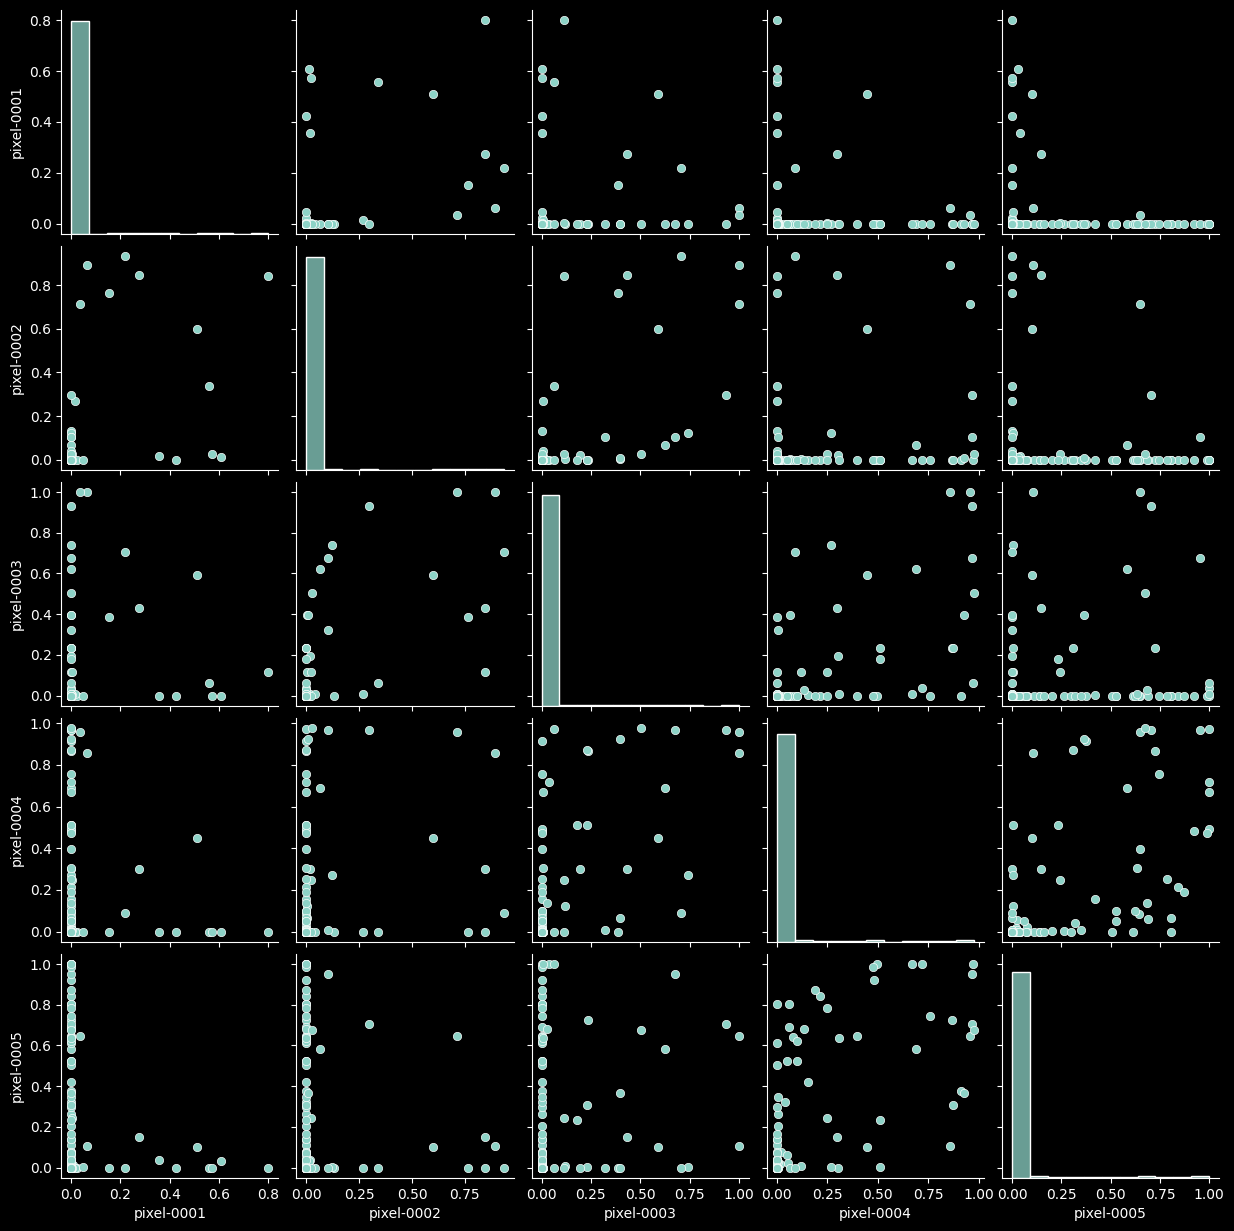

In [51]:
sns.pairplot(X_plot);

Видим, что чем ближе к центру пиксели, тем интересней становится картина

# Применяем Метод Главных Компонент к данным MNIST

In [52]:
pca = PCA(n_components = 100)
pca.fit(X_)
pca.score(X_)

0.861046978262735

In [53]:
pca_result_mnist = pca.transform(X_)

In [54]:
pca_inverse = pca.inverse_transform(pca_result_mnist)

In [55]:
pca_inverse.shape

(70000, 784)

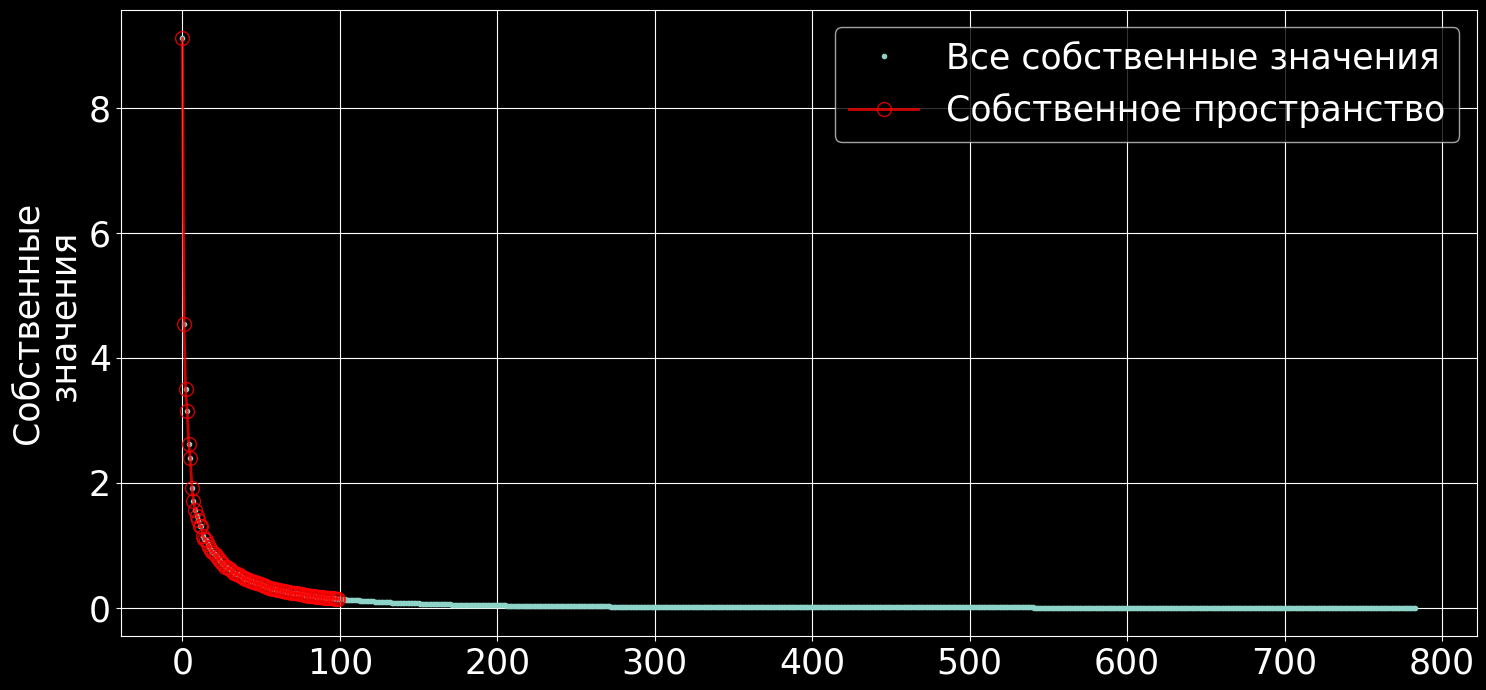

In [56]:
pca.plot_eigvalues();

# Оценим собственные значения / кумулятивную дисперсию

In [57]:
Eigen_Values = pca.values

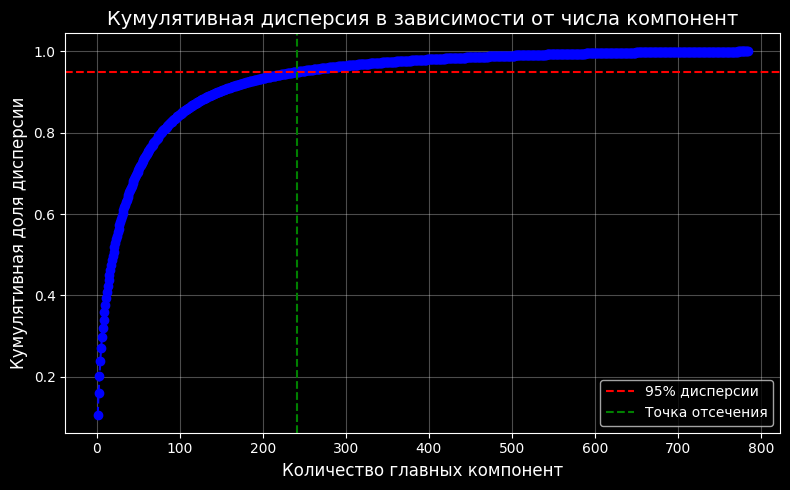

In [58]:
explained_variance_ratio = Eigen_Values / np.sum(Eigen_Values)

# Кумулятивная сумма долей дисперсии
cumulative_variance = np.cumsum(explained_variance_ratio)

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(Eigen_Values) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Количество главных компонент', fontsize=12)
plt.ylabel('Кумулятивная доля дисперсии', fontsize=12)
plt.title('Кумулятивная дисперсия в зависимости от числа компонент', fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--', label='Точка отсечения')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

По графику видно, что для снижения размерности без большой потери информации должно быть достаточно примерно 200 компонент

# Оценим качество восстановления при разных значениях размерности собственного пространства

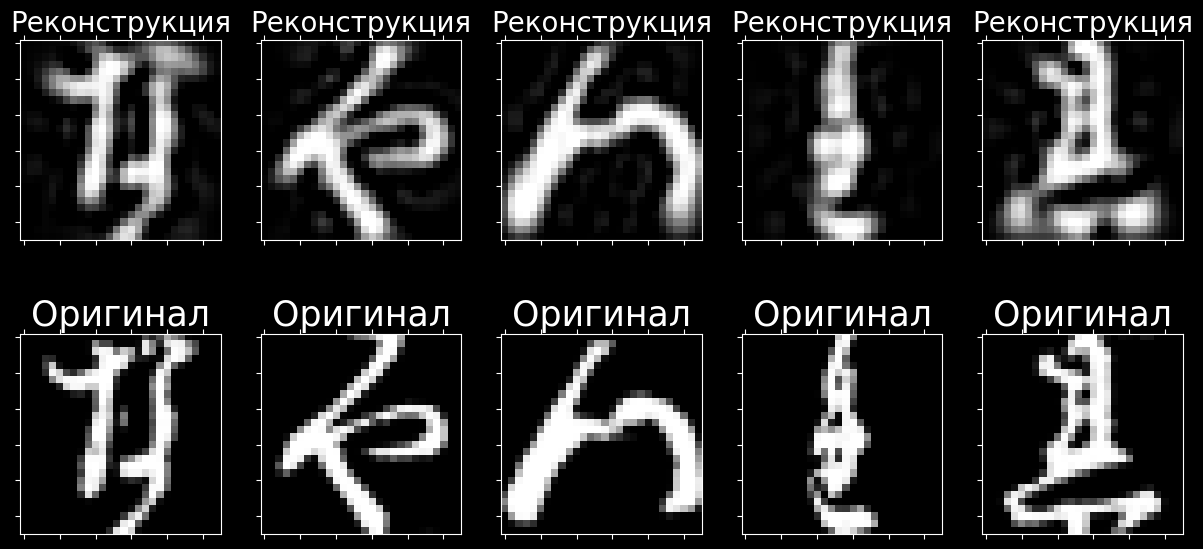

In [59]:
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)
  ax.matshow(1-X_[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Это было при размерности 100. Попробуем для размерности 200

In [60]:
pca_200 = PCA(n_components = 200)
pca_200.fit(X_)
pca_200.score(X_)

pca_result_mnist_200 = pca_200.transform(X_)

pca_inverse_200 = pca_200.inverse_transform(pca_result_mnist_200)
pca_inverse_200.shape

(70000, 784)

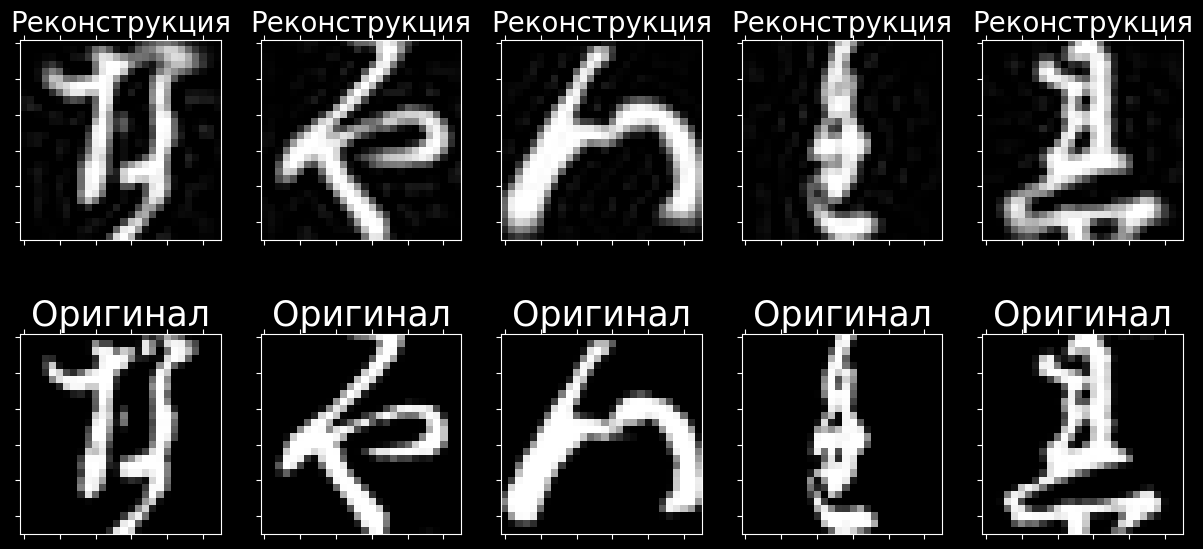

In [61]:
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)
  ax.matshow(1-pca_inverse_200[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)
  ax.matshow(1-X_[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Однозначно качество реконструкции повысилось. Ладно, поробуем по 50 компонент, а после 250

In [62]:
pca_50 = PCA(n_components = 50)
pca_50.fit(X_)
pca_50.score(X_)

pca_result_mnist_50 = pca_50.transform(X_)

pca_inverse_50 = pca_50.inverse_transform(pca_result_mnist_50)
pca_inverse_50.shape

(70000, 784)

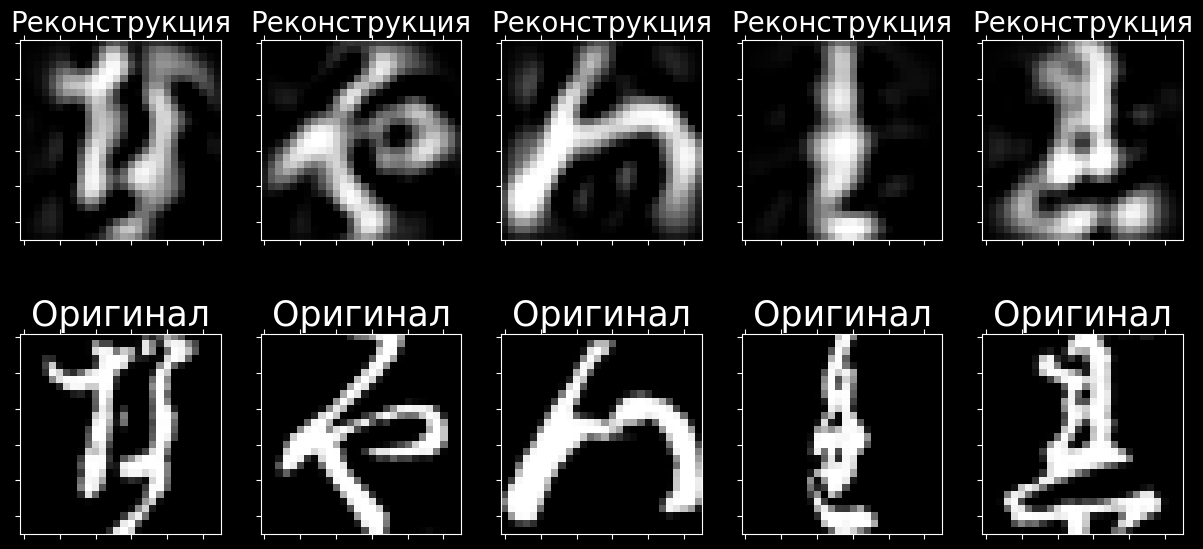

In [63]:
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)
  ax.matshow(1-pca_inverse_50[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)
  ax.matshow(1-X_[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

Ужас. Переходим к 250 компонентам

In [64]:
pca_250 = PCA(n_components = 250)
pca_250.fit(X_)
pca_250.score(X_)

pca_result_mnist_250 = pca_250.transform(X_)

pca_inverse_250 = pca_250.inverse_transform(pca_result_mnist_250)
pca_inverse_250.shape

(70000, 784)

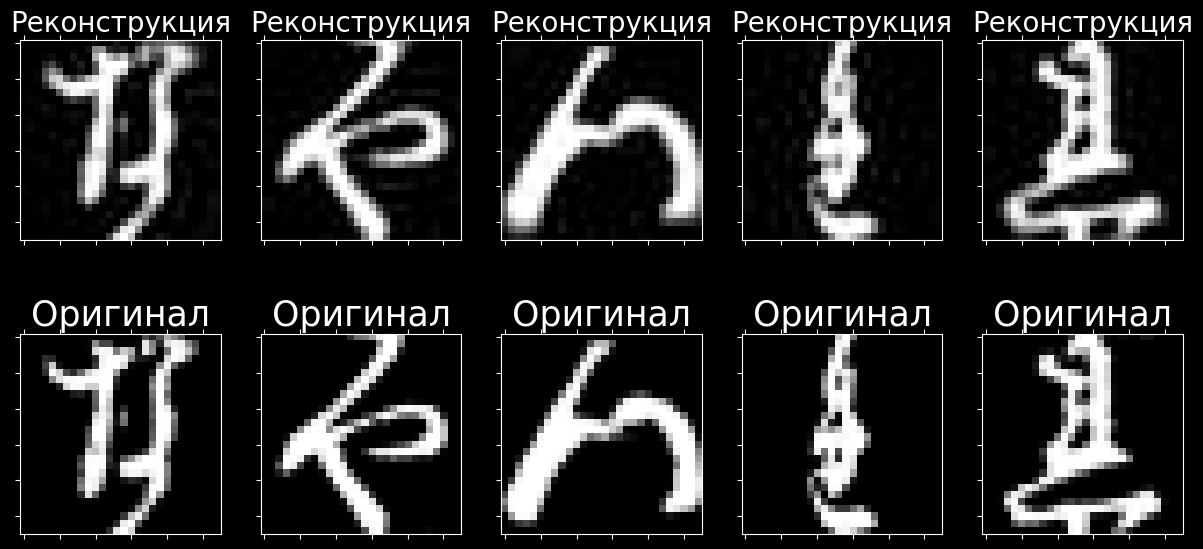

In [65]:
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)
  ax.matshow(1-pca_inverse_250[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)
  ax.matshow(1-X_[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

В целом, между реконструкциями с 200 и 250 компонентами не такая уж и большая разница, хотя с 250 реконструкция четче

# Визуализируем разные пространства главных компонент

In [66]:
def plot_multi(data, y,  names):
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2
    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Класс",
                        fontsize = 15) # собираем легенду
        ax.add_artist(legend1)

In [67]:
pca_names = [str(x+1)+'-я главная компонента' for x in range(4)]

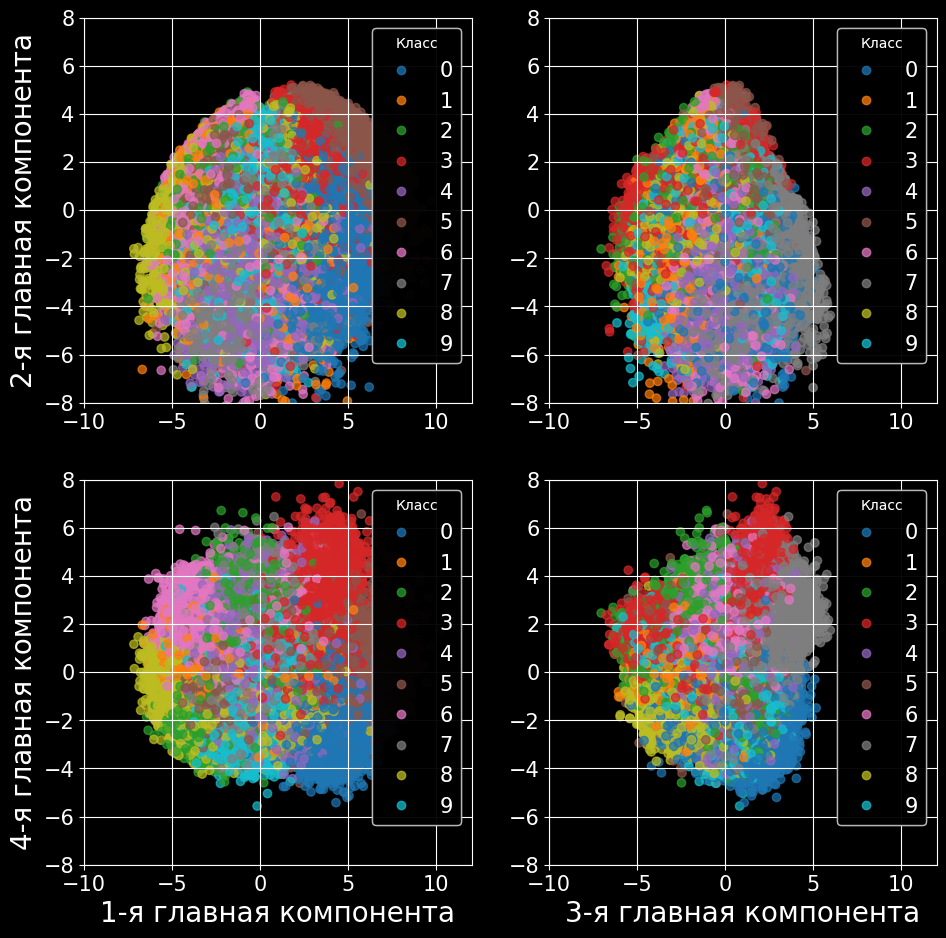

In [68]:
plot_multi(pca_result_mnist_200, y.astype(int), pca_names);

В целом, можно что-то выделить. Например на паре компонент 4 и 1 достаточно много (относительно других пар) не смешанных компонент. Но все еще не то. Попробуем другие пространства

In [69]:
pca_names_2 = [str(x+1)+'-я главная компонента' for x in range(4, 8)]

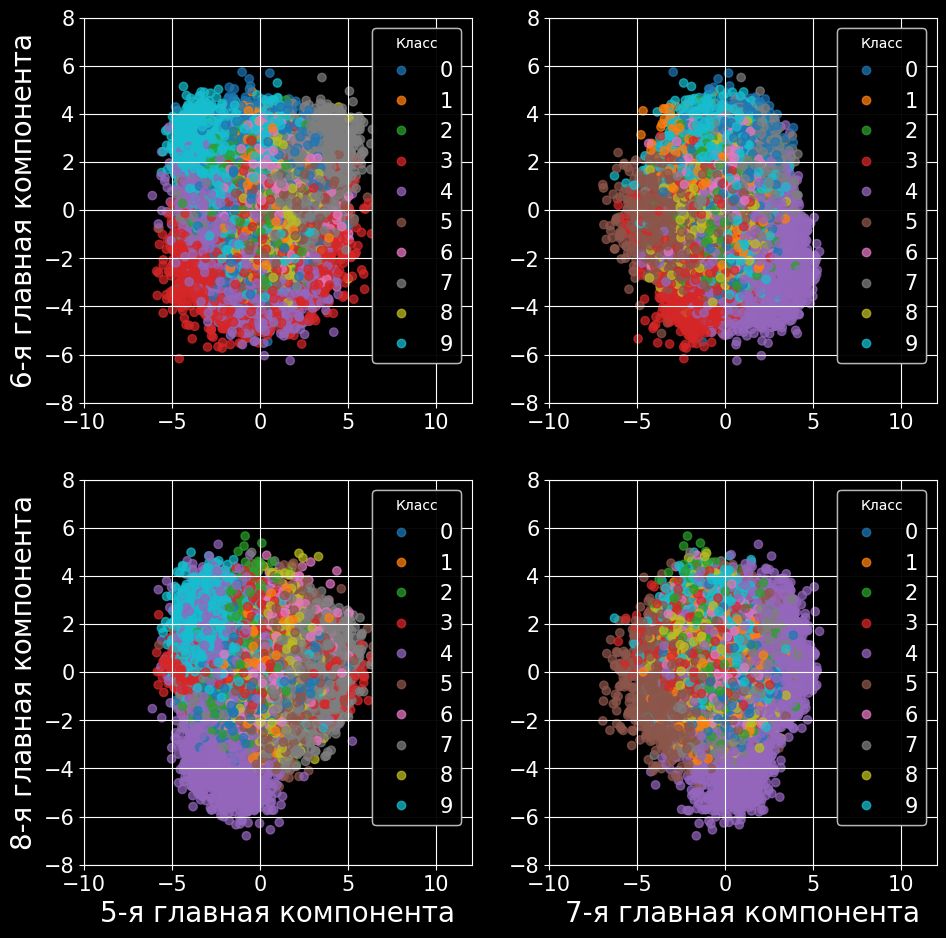

In [70]:
plot_multi(pca_result_mnist[:, 4:8], y.astype(int), pca_names_2);

Тут вообще все напутано, но вот 4й (лиловый) класс на 3 из 4 пар компонент хорошо выделяется

# Визуализируем разные собственные вектора

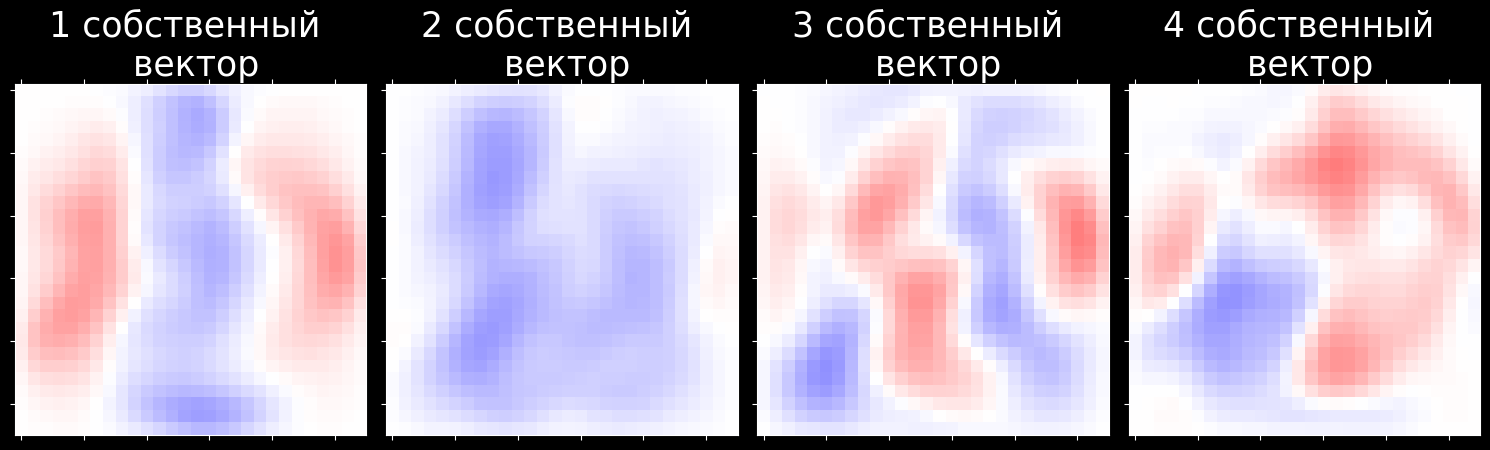

In [71]:
W_pca=pca.components.T
fig=plt.figure(figsize=(15,5))
for i in range(0,4):
  ax = fig.add_subplot(1,4,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=25)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.20,vmax = 0.20)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

Собственные векторы возможно показывают общую форму (1 вектор), направление основных черт (2 вектор), сложные пересечения (3 вектор) и мелкие детали (4 вектор) по которым отличают иероглифы

In [72]:
pca.components.shape

(784, 100)

In [73]:
sum(np.abs(pca.components[:,0])>0.001)

749

Многовато признаков, следовательно чтобы распознать иероглиф, придется задействовать большое количество признаков

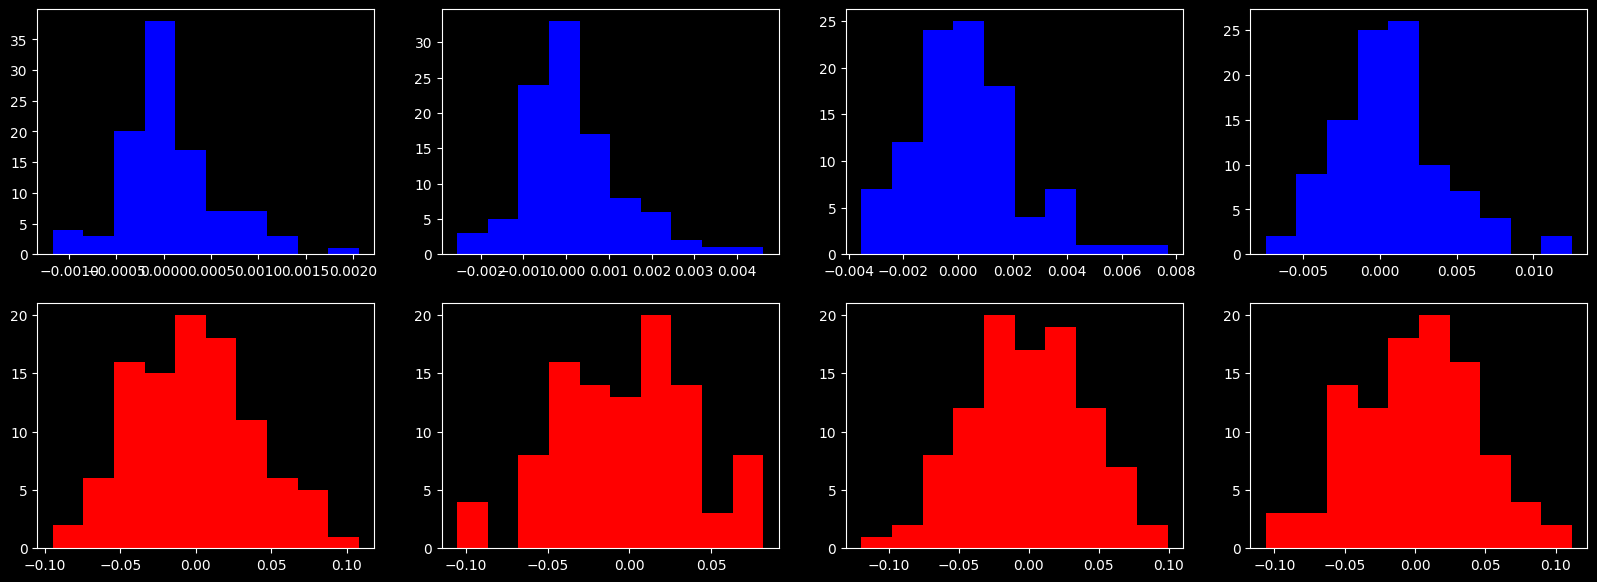

In [74]:
fig = plt.figure(figsize = (20,7))

plt.subplot(241)
plt.hist(pca.components[0,:],color='b')

plt.subplot(242)
plt.hist(pca.components[1,:],color='b')

plt.subplot(243)
plt.hist(pca.components[2,:],color='b')

plt.subplot(244)
plt.hist(pca.components[3,:],color='b')

plt.subplot(245)
plt.hist(pca.components[370,:],color='r')

plt.subplot(246)
plt.hist(pca.components[371,:],color='r')

plt.subplot(247)
plt.hist(pca.components[372,:],color='r')

plt.subplot(248)
plt.hist(pca.components[373,:],color='r');

Видно, что первые пиксели недалеко уходят от 0 и являются относительно бесполезными. Чем ближе к центру, тем пиксели становятся полезней

# Выводы

PCA частично смог выделить группы иероглифов, что видно из визуализации пространств главных компонент, данные разных классов (иероглифов) имеют перекрытия, но главные компоненты все же немного улавливают ключевые вариации.
 PCA не создавал явного разделения классов, так как метод направлен на максимизацию дисперсии, а не на учет меток классов. Думаю для задач разделения на классы нужно выбирать другой метод (мы же все таки минимизируем, а не определяем классы!). Если говорить про некоторые расмотренные главные компоненты, то  1я компонента улавливает крупные черты и глобальные отличия формы иероглифов, 2я компонента связана с вертикальными и симметричными элементами, 3я и 4я компоненты акцентируют внимание на локальных деталях, таких как изгибы или мелкие черты